In [1]:
import matplotlib.pyplot as plt
import random as rd

def draw_graph(num):
    instance = list(map(lambda x: list(map(lambda y: int(y), x.split())), open("Rust/src/data/p{:02}".format(num),"r").read().split('\n')))
    vehicles_per_depot = instance[0][0]
    n_customers = instance[0][1]
    n_depots = instance[0][2]

    result = open("Rust/p{}.txt".format(num),"r").read().split('\n')
    result.pop(0)

    def draw_path(p):
        color = (rd.uniform(0, 1), rd.uniform(0, 1), rd.uniform(0, 1))
        (dep_x, dep_y) = (instance[n_depots + n_customers + int(p[0])][1], instance[n_depots + n_customers + int(p[0])][2])
        for i in range(5):
            p.pop(0)
        p.pop(-1)

        (previous_x, previous_y) = (dep_x, dep_y)
        (newpos_x, newpos_y) = (dep_x, dep_y)
        for pos in p:
            (newpos_x, newpos_y) = (instance[n_depots + int(pos)][1], instance[n_depots + int(pos)][2])
            plt.plot([previous_x,newpos_x],[previous_y,newpos_y], color=color)
            plt.plot([newpos_x], [newpos_y], marker='o', markersize=5, color=color)
            (previous_x, previous_y) = (newpos_x, newpos_y)

        plt.plot([newpos_x,dep_x],[newpos_y,dep_y], color=color)
        return instance[0][0]

    for p in result:
        draw_path(list(map(lambda x: int(x), p.split())))

    plt.axis('off')
    plt.savefig('Rust/p{}.jpg'.format(num), format='jpg', quality=95, dpi=1000)
    plt.show()

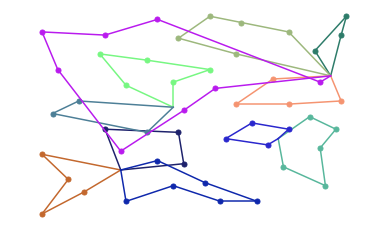

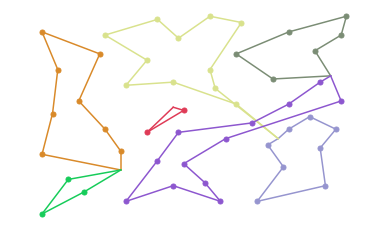

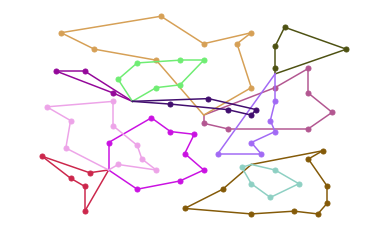

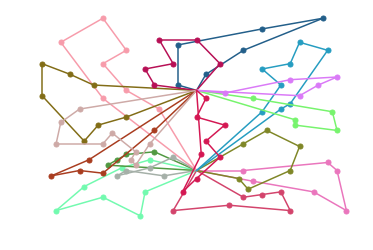

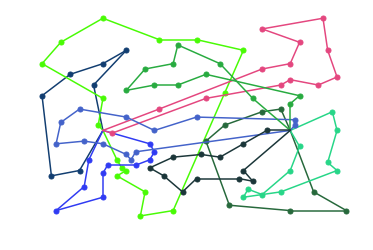

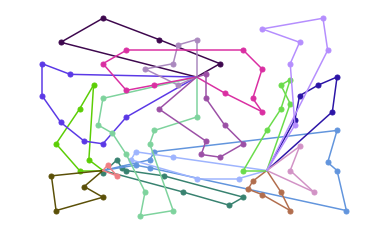

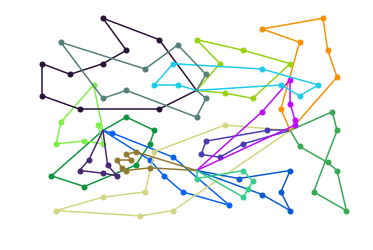

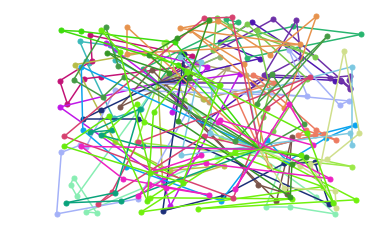

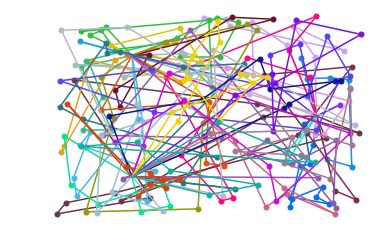

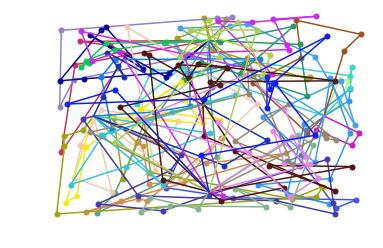

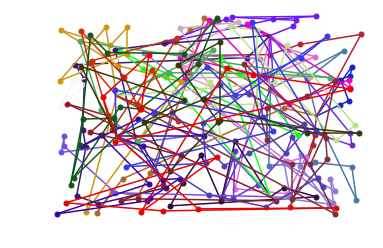

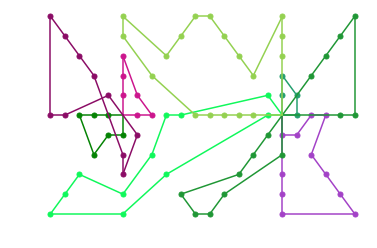

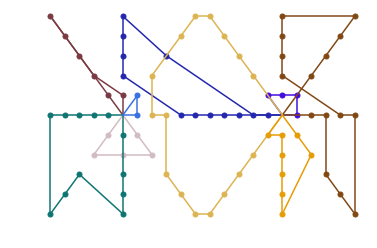

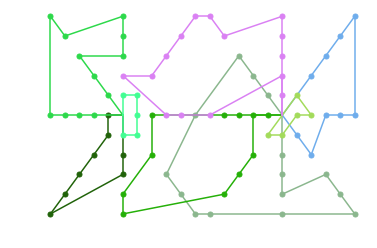

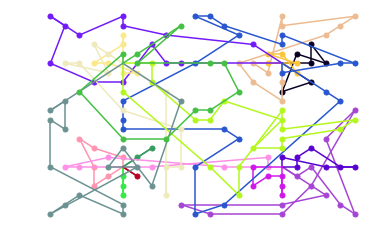

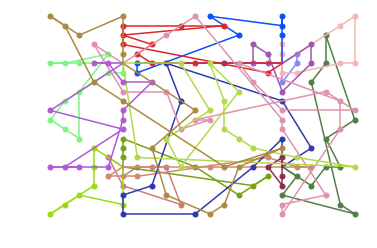

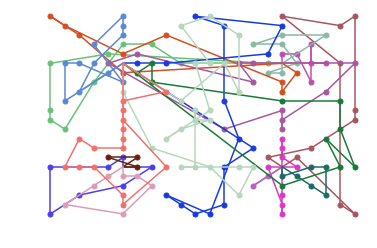

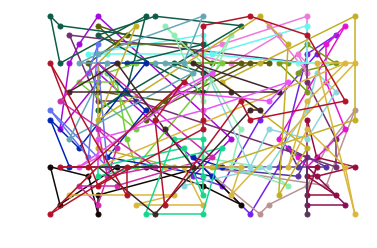

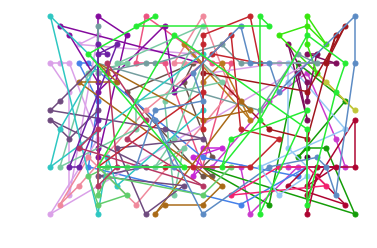

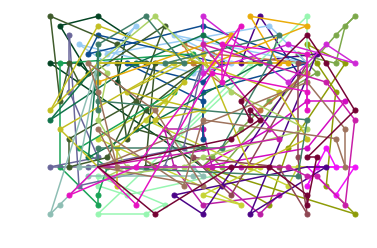

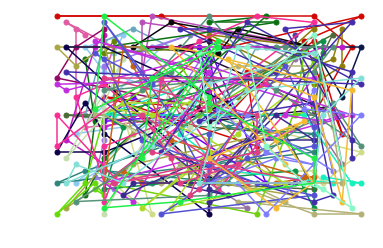

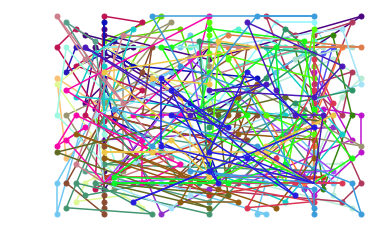

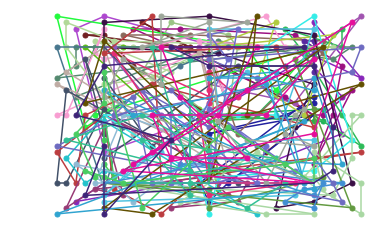

In [2]:
for i in range(1, 24):
    draw_graph(i)